3.1 Warming Up Exercises - Basic Inspection and Exploration:

Problem 1 - Data Read, Write and Inspect:

1. Load the dataset

In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


2. Inspect the DataFrame

(a) columns with dtypes=object

In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")

print("\n(a) Columns with dtype=object:")
object_cols = df.select_dtypes(include='object').columns
print(object_cols)


(a) Columns with dtype=object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')


(b) Unique values of each object column

In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")

print("\n(b) Unique values for each object column:")
for col in object_cols:
    print(f"\nColumn: {col}")
    print(df[col].unique())


(b) Unique values for each object column:

Column: job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']

Column: marital
['married' 'single' 'divorced']

Column: education
['tertiary' 'secondary' 'unknown' 'primary']

Column: default
['no' 'yes']

Column: housing
['yes' 'no']

Column: loan
['no' 'yes']

Column: contact
['unknown' 'cellular' 'telephone']

Column: month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

Column: poutcome
['unknown' 'failure' 'other' 'success']

Column: y
['no' 'yes']


(c) Total number of null values in each column

In [6]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")

print("\n(c) Total number of null values in each column:")
print(df.isnull().sum())


(c) Total number of null values in each column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


3. Drop object columns and save as new CSV

In [8]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")

df_numeric = df.drop(columns=object_cols)
df_numeric.to_csv("banknumericdata.csv", index=False)
print("\nNew numeric dataset saved as 'banknumericdata.csv'")


New numeric dataset saved as 'banknumericdata.csv'


4. Read the saved file and show summary statistics

In [9]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/bank.csv")
df_new = pd.read_csv("banknumericdata.csv")
print("\nSummary Statistics of Numeric Data:")
print(df_new.describe())


Summary Statistics of Numeric Data:
                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0

Problem 2 - Data Imputations:

1. Load the provided dataset and import in pandas DataFrame.

In [10]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/medical_students_dataset.csv")
print("Dataset Loaded Successfully!\n")
print(df.head())

Dataset Loaded Successfully!

   Student ID   Age  Gender      Height     Weight Blood Type        BMI  \
0         1.0  18.0  Female  161.777924  72.354947          O  27.645835   
1         2.0   NaN    Male  152.069157  47.630941          B        NaN   
2         3.0  32.0  Female  182.537664  55.741083          A  16.729017   
3         NaN  30.0    Male  182.112867  63.332207          B  19.096042   
4         5.0  23.0  Female         NaN  46.234173          O        NaN   

   Temperature  Heart Rate  Blood Pressure  Cholesterol Diabetes Smoking  
0          NaN        95.0           109.0        203.0       No     NaN  
1    98.714977        93.0           104.0        163.0       No      No  
2    98.260293        76.0           130.0        216.0      Yes      No  
3    98.839605        99.0           112.0        141.0       No     Yes  
4    98.480008        95.0             NaN        231.0       No      No  


2. Check info + identify columns with missing values

In [11]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/medical_students_dataset.csv")

print("\nDataFrame Info:")
print(df.info())

print("\nColumns with Missing (Null) Values:")
print(df.isnull().sum())


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
None

Columns with Missing (Null) Values:
Student ID        20000
Age               20000
Gender            20000
Height         

3. Handle missing values (Imputation)

In [14]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/medical_students_dataset.csv")

null_cols = df.columns[df.isnull().sum() > 0]
print("Columns with null values:", null_cols)

for col in null_cols:
    if df[col].dtype != 'object':
        df[col] = df[col].fillna(df[col].median())
        print(f"Filled numeric column '{col}' using MEDIAN.")
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Filled categorical column '{col}' using MODE.")

print("\nMissing values after imputation:")
print(df.isnull().sum())

Columns with null values: Index(['Student ID', 'Age', 'Gender', 'Height', 'Weight', 'Blood Type', 'BMI',
       'Temperature', 'Heart Rate', 'Blood Pressure', 'Cholesterol',
       'Diabetes', 'Smoking'],
      dtype='object')
Filled numeric column 'Student ID' using MEDIAN.
Filled numeric column 'Age' using MEDIAN.
Filled categorical column 'Gender' using MODE.
Filled numeric column 'Height' using MEDIAN.
Filled numeric column 'Weight' using MEDIAN.
Filled categorical column 'Blood Type' using MODE.
Filled numeric column 'BMI' using MEDIAN.
Filled numeric column 'Temperature' using MEDIAN.
Filled numeric column 'Heart Rate' using MEDIAN.
Filled numeric column 'Blood Pressure' using MEDIAN.
Filled numeric column 'Cholesterol' using MEDIAN.
Filled categorical column 'Diabetes' using MODE.
Filled categorical column 'Smoking' using MODE.

Missing values after imputation:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0

4. Check and handle duplicates

In [16]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/medical_students_dataset.csv")

print("\nTotal Duplicate Rows:", df.duplicated().sum())

df_cleaned = df.drop_duplicates()

print("Duplicates removed!")
print("Total rows after removing duplicates:", len(df_cleaned))

df_cleaned.head()


Total Duplicate Rows: 7644
Duplicates removed!
Total rows after removing duplicates: 192356


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

Problem - 1:

In [17]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/Titanic-Dataset.csv")

subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class = subset[subset['Pclass'] == 1]

mean_fare = first_class['Fare'].mean()
median_fare = first_class['Fare'].median()
max_fare = first_class['Fare'].max()
min_fare = first_class['Fare'].min()

print("Mean Fare:", mean_fare)
print("Median Fare:", median_fare)
print("Maximum Fare:", max_fare)
print("Minimum Fare:", min_fare)


Mean Fare: 84.1546875
Median Fare: 60.287499999999994
Maximum Fare: 512.3292
Minimum Fare: 0.0


Problem - 2:

In [18]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/Titanic-Dataset.csv")

subset = df[['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

first_class = subset[subset['Pclass'] == 1]

null_age_count = first_class['Age'].isnull().sum()
print("Number of null values in 'Age' column:", null_age_count)

first_class_clean = first_class.dropna(subset=['Age'])

print("Number of null values in 'Age' after dropping:", first_class_clean['Age'].isnull().sum())
print("Shape of cleaned DataFrame:", first_class_clean.shape)


Number of null values in 'Age' column: 30
Number of null values in 'Age' after dropping: 0
Shape of cleaned DataFrame: (186, 6)


Problem - 3:

In [22]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Dataset2/Titanic-Dataset.csv")

embarked_dummies = pd.get_dummies(df['Embarked'], prefix='Embarked')

df = pd.concat([df, embarked_dummies], axis=1)

df.drop('Embarked', axis=1, inplace=True)

print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:

Mean Survival Rates by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


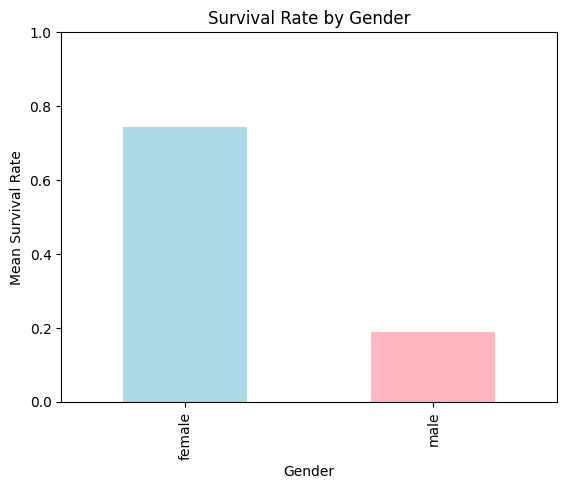

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Dataset2/Titanic-Dataset.csv")

survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Mean Survival Rates by Gender:")
print(survival_by_gender)

survival_by_gender.plot(kind='bar', color=['lightblue', 'lightpink'])
plt.title("Survival Rate by Gender")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Gender")
plt.ylim(0, 1)
plt.show()


Problem - 5:

Sex         female      male
Embarked                    
C         0.876712  0.305263
Q         0.750000  0.073171
S         0.689655  0.174603


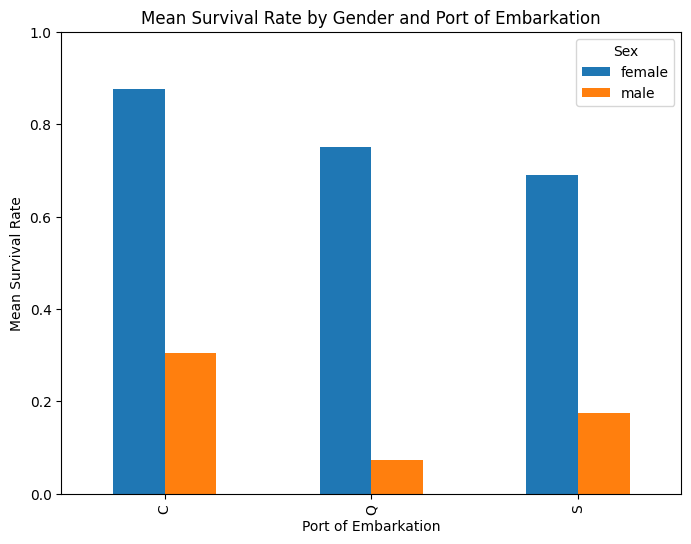

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Dataset2/Titanic-Dataset.csv")

survival_by_sex_embarked = df.groupby(['Embarked', 'Sex'])['Survived'].mean().unstack()
print(survival_by_sex_embarked)

survival_by_sex_embarked.plot(kind='bar', figsize=(8,6))
plt.title("Mean Survival Rate by Gender and Port of Embarkation")
plt.ylabel("Mean Survival Rate")
plt.xlabel("Port of Embarkation")
plt.ylim(0, 1)
plt.legend(title="Sex")
plt.show()
